---
# <font color="DarkBlue"><b><center>Escuela Politécnica Nacional</center></b></font>
---

## <font color="DarkGreen"><center>Ransomware dynamics: Mitigating personal data exfiltration through the SCIRAS lens</font>

## <font color="DarkGreen"><center>Traditional machine learning algorithms</font>

**Author:** David Cevallos-Salas, José Estrada-Jiménez, Danny S. Guamán, Luis Felipe Urquiza

**Date:** 2024-10-17

**Google Colab Link:**
https://colab.research.google.com/drive/1uwKCCKrNINGLHxopbiTWtgmEcTwNVgm2

In [ ]:
# Importing libraries
from os import X_OK
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical,plot_model
from sklearn.pipeline import Pipeline as skPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
import sklearn.metrics as mt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import imblearn.metrics as imt
import zipfile
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!git clone https://github.com/dcevallossalas/sanrap_sciras

node = "win7"
y = np.array([])
first = True
first1 = True

families = os.listdir("/content/sanrap_sciras/" + node + "/")

for family in families:
  annotations = os.listdir("/content/sanrap_sciras/" + node + "/" + family)
  for annotation in annotations:
    files =  os.listdir("/content/sanrap_sciras/" + node + "/" + family + "/" + annotation)
    for file in files:
      zipped = False
      if file.endswith(".zip"):
        zipped = True
        path1 = "/content/sanrap_sciras/" + node + "/" + family + "/" + annotation + "/" + file
        path2 = "/home"
        with zipfile.ZipFile(path1, 'r') as zip_ref:
          zip_ref.extractall(path2)

        file = file.replace(".zip",".csv")

      if file.endswith("write.csv"):
        if zipped:
          data = pd.read_csv(path2 + "/original/win7-250gb-ssd/"+ family + "/" + annotation+"/" + file)
        else:
          data = pd.read_csv("/content/sanrap_sciras/" + node + "/" + family + "/" + annotation+"/" + file)

        x1 = data.drop(data.columns[0],axis=1).to_numpy()

        if first:
          x = x1
          first = False
        else:
          x = np.concatenate((x,x1))

        n = len(x1)

        if annotation.startswith("TeslaCrypt"):
          code = 1
        elif annotation.startswith("WannaCry"):
          code = 2
        elif annotation.startswith("Cerber"):
          code = 3
        elif annotation.startswith("Gand"):
          code = 4
        elif annotation.startswith("Ryuk"):
          code = 5
        elif annotation.startswith("Sodi"):
          code = 6
        elif annotation.startswith("Dark"):
          code = 7
        else:
          code = 0

        if first1:
          y = np.full(n,code)
          first1 = False
        else:
          y = np.concatenate((y,np.full(n,code)))

# Number of metrics
num_metrics = 8

# Number of classes
num_classes = 8

# Definition of labels
labels = [
    "Benign",
    "TeslaCrypt",
    "WannaCry",
    "Cerber",
    "GandCrab-v4",
    "Ryuk",
    "Sodinokibi",
    "Darkside"
]

Cloning into 'sanrap_sciras'...
remote: Enumerating objects: 393, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 393 (delta 16), reused 133 (delta 16), pack-reused 260 (from 1)
Receiving objects: 100% (393/393), 958.36 MiB | 19.04 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (242/242), done.


In [ ]:
# Representative random stratified sample
x, x1, y, y1 = train_test_split(x, y, train_size=0.07, shuffle=True, random_state = 1234, stratify=y)

# Splitting (training and test balanced sets definitions)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state = 1234, stratify = y)

# Visualize general shapes on screen
print("Shape x (features):", x.shape)
print("Shape y (families labels): ", y.shape)

# Number of samples per category
print("Benign: " + str(np.sum(y==0)))
print("TeslaCrypt: " + str(np.sum(y==1)))
print("WannaCry: " + str(np.sum(y==2)))
print("Cerber: " + str(np.sum(y==3)))
print("GandCrab-v4: " + str(np.sum(y==4)))
print("Ryuk: " + str(np.sum(y==5)))
print("Sodinokibi: " + str(np.sum(y==6)))
print("Darkside: " + str(np.sum(y==7)))

Shape x (features): (3603838, 5)
Shape y (families labels):  (3603838,)
Benign: 2467126
TeslaCrypt: 16233
WannaCry: 327689
Cerber: 74738
GandCrab-v4: 180566
Ryuk: 152411
Sodinokibi: 139199
Darkside: 245876


In [ ]:
def visualizeResults(x_test, y_test, pipeline):
  # Test evaluation
  y_test_pred_proba = pipeline.predict_proba(x_test)

  y_test_pred = pipeline.predict(x_test)
  f1score = mt.f1_score(y_test, y_test_pred, average="weighted")
  acc = mt.accuracy_score(y_test, y_test_pred)
  preci = mt.precision_score(y_test, y_test_pred, average="weighted")
  recall = mt.recall_score(y_test, y_test_pred, average="weighted")

  # Classification report
  print("Classification report")
  report = mt.classification_report(y_test, y_test_pred)
  print(report)

  # Confusion matrix
  # TN FP
  # FN TP
  # print("Confusion matrix")
  # print(y_test_pred)
  cm = mt.confusion_matrix(y_test, y_test_pred)
  pd_cm = pd.DataFrame(cm,
             columns=labels,
             index=labels)
  # print(pd_cm)

  # Display confusion matrix using ConfusionMatrixDisplay
  # g_cm = mt.ConfusionMatrixDisplay(cm,display_labels=labels).plot()
  # plt.show(g_cm)

  # Display confusion matrix using Heat Map
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax,
    square=True,
    cmap="Blues",
    linewidths=0.2,
    annot_kws={"fontsize":5.5})
  ax.set_xlabel("Predicted values", fontsize=8)
  ax.set_ylabel("True values", fontsize=8)
  ax.xaxis.set_ticklabels(labels, fontsize=8)
  ax.yaxis.set_ticklabels(labels, fontsize=8)
  cbar = ax.collections[0].colorbar
  cbar.ax.tick_params(labelsize=8)
  plt.yticks(rotation=0)
  plt.xticks(rotation=90)

  # ROC curves
  import colorcet as cc

  palette = sns.color_palette(cc.glasbey, num_classes)
  palette1 = sns.color_palette(cc.glasbey, 16)
  palette[0] = palette1[10]
  palette[1] = palette1[0]

  t_test_oneh = to_categorical(y_test,num_classes)
  fig, ax = plt.subplots()
  auc = 0

  for i in np.arange(0,num_classes):
    fpr, tpr, thresholds = mt.roc_curve(t_test_oneh[:, i], y_test_pred_proba[:, i])
    auc_value = round(mt.auc(fpr, tpr),4)
    auc = auc+auc_value
    plt.plot(fpr, tpr,color=palette[i],label=labels[i] + " (AUC="+str(auc_value)+")")

  plt.plot([0,1],[0,1],"k--")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="best", prop={'size': 6})
  plt.grid()
  plt.show()

  auc = auc/num_classes

  # Test evaluation results
  print("Test evaluation results: recall =", recall, ", F1 =", f1score, ", acc =", acc, ", precision =", preci, "auc =", auc)


In [ ]:
# Function for calculating Metrics - Multiclass classifier
def calculateMetrics(ytrue, ypred, yproba, labels, pictures=False):
  if pictures:
    print("Matriz de confusión")
    cm = mt.confusion_matrix(ytrue, ypred)

    # Matrix confusion
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax,
      square=True,
      cmap="Blues",
      linewidths=0.2,
      annot_kws={"fontsize":5.5})
    ax.set_xlabel("Predicted category", fontsize=8)
    ax.set_ylabel("True category", fontsize=8)
    ax.xaxis.set_ticklabels(labels, fontsize=8)
    ax.yaxis.set_ticklabels(labels, fontsize=8)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()

  # Calculating metrics
  precision = mt.precision_score(ytrue, ypred, average="micro")
  recall = mt.recall_score(ytrue, ypred, average="micro")
  f1score = mt.f1_score(ytrue, ypred, average="micro")
  accuracy = mt.accuracy_score(ytrue, ypred)
  error = 1-accuracy
  specificity = imt.specificity_score(ytrue, ypred, average="micro")
  fprm = 1-specificity

  # ROC curve
  numClases = len(labels)

  if pictures:
    numClases_color = numClases

    if numClases < numClases:
      numClases_color = numClases

    palette = sns.color_palette(cc.glasbey, numClases_color)
    palette = [palette[10],palette[0]]+palette[1:10]+palette[11:]
    fig, ax = plt.subplots()

  ytrue_oneh = to_categorical(ytrue,num_classes)
  auc=0

  for i in np.arange(0,numClases):
    fpr, tpr, thresholds = mt.roc_curve(ytrue_oneh[:, i], yproba[:, i], drop_intermediate=False)
    auc_value = round(mt.auc(fpr, tpr),4)
    auc = auc + auc_value
    if pictures:
      plt.plot(fpr, tpr, color=palette[i], label=labels[i] + " (AUC="+str(auc_value)+")")

  if pictures:
    plt.plot([0,1], [0,1], "--k")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right", prop={'size': 6})
    plt.grid()
    plt.show()

  auc = auc/numClases

  # Present metrics
  print("------------------------------")
  print("Valores de métricas obtenidas:")
  print("------------------------------")
  print("precision:", precision)
  print("recall:", recall)
  print("f1-score:", f1score)
  print("accuracy:", accuracy)
  print("error:", error)
  print("specificity:", specificity)
  print("false positive rate:", fprm)
  print("auc:", auc)

  return np.array([[precision],[recall],[f1score],[accuracy],[error],[specificity],[fprm],[auc]])

In [ ]:
def visualizeResultsGeneral(x_test, y_test, pipeline):
  # Test evaluation
  # y_test_pred_proba = pipeline.predict_proba(x_test)

  y_test_pred = pipeline.predict(x_test)
  f1score = mt.f1_score(y_test, y_test_pred, average="weighted")
  acc = mt.accuracy_score(y_test, y_test_pred)
  preci = mt.precision_score(y_test, y_test_pred, average="weighted")
  recall = mt.recall_score(y_test, y_test_pred, average="weighted")

  # Classification report
  print("Classification report")
  report = mt.classification_report(y_test, y_test_pred)
  print(report)

  # Confusion matrix
  # TN FP
  # FN TP
  # print("Confusion matrix")
  # print(y_test_pred)

  cm = mt.confusion_matrix(y_test, y_test_pred)
  pd_cm = pd.DataFrame(cm,
             columns=labels,
             index=labels)
  # print(pd_cm)

  # Display confusion matrix using ConfusionMatrixDisplay
  # g_cm = mt.ConfusionMatrixDisplay(cm,display_labels=labels).plot()
  # plt.show(g_cm)

  # Display confusion matrix using Heat Map
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax,
    square=True,
    cmap="Blues",
    linewidths=0.2,
    annot_kws={"fontsize":5.5})
  ax.set_xlabel("Predicted values", fontsize=8)
  ax.set_ylabel("True values", fontsize=8)
  ax.xaxis.set_ticklabels(labels, fontsize=8)
  ax.yaxis.set_ticklabels(labels, fontsize=8)
  cbar = ax.collections[0].colorbar
  cbar.ax.tick_params(labelsize=8)
  plt.yticks(rotation=0)
  plt.xticks(rotation=90)

  # Test evaluation results
  print("Test evaluation results: recall =", recall, ", F1 =", f1score, ", acc =", acc, ", precision =", preci)

# Decision Tree

In [ ]:
# General
np.random.seed(1)

pipeline_nsm = skPipeline([
        ("scaler", StandardScaler()),
        ("clf", tree.DecisionTreeClassifier(random_state=0))])

# Repeated kfold cross validation definition
rkfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=45)

# Parameters of grid
param_grid = {
                "clf__criterion": ["gini","entropy"],
                "clf__max_depth": [1,3]
              }

# #####################
# GridSearchCV
# #####################
print("------------------------------")
print("Decision tree")
print("------------------------------")
search = GridSearchCV(pipeline_nsm, param_grid, cv=rkfold, scoring='f1_micro', verbose=4)
result = search.fit(x_train, y_train)

# Training with best hyperparameters
pipeline_nsm.set_params(
    clf__criterion = result.best_params_["clf__criterion"],
    clf__max_depth = result.best_params_["clf__max_depth"]
    )

print(f"Best result at validation set: {result.best_score_} with hyperparameters {result.best_params_}")

print("Retraining:")
pipeline_nsm.fit(x_train, y_train)




------------------------------
Decision tree
------------------------------
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.4s
[CV 2/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   4.1s
[CV 3/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.3s
[CV 4/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.3s
[CV 5/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.6s
[CV 6/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.9s
[CV 7/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.3s
[CV 8/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.2s
[CV 9/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.7s
[CV 10/10] END clf__criterion=gini, clf__max_depth=1;, score=0.685 total time=   3.9s
[CV 1/10] EN

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=3, random_state=0))])

Classification report
              precision    recall  f1-score   support

           0       0.77      0.96      0.86    493425
           1       0.00      0.00      0.00      3247
           2       0.70      0.50      0.58     65538
           3       0.00      0.00      0.00     14948
           4       0.26      0.45      0.33     36113
           5       0.00      0.00      0.00     30482
           6       0.00      0.00      0.00     27840
           7       0.00      0.00      0.00     49175

    accuracy                           0.72    720768
   macro avg       0.22      0.24      0.22    720768
weighted avg       0.61      0.72      0.66    720768



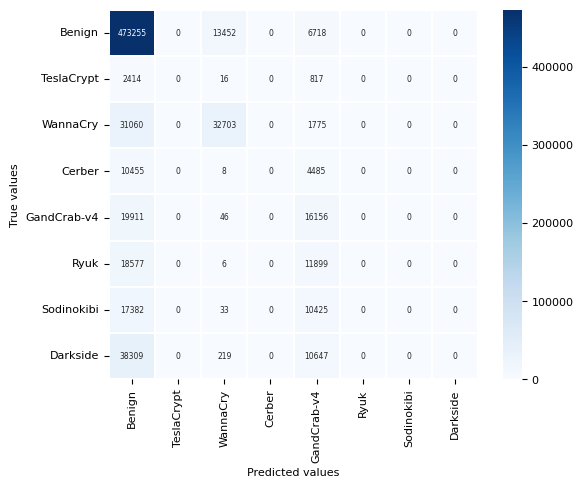

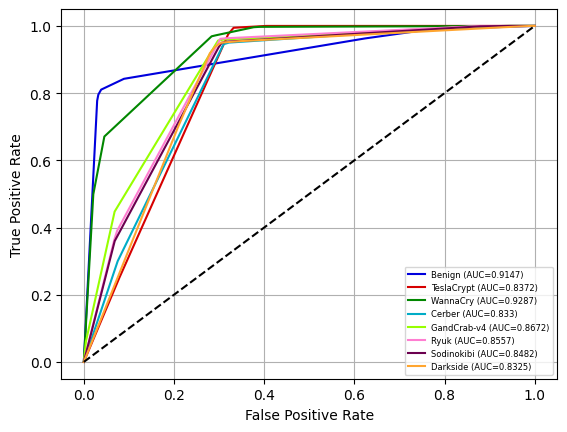

Test evaluation results: recall = 0.7243856553010123 , F1 = 0.6559428329736008 , acc = 0.7243856553010123 , precision = 0.6067707816284642 auc = 0.8646500000000001


In [ ]:
visualizeResults(x_test, y_test, pipeline_nsm)

# Random Forest

In [ ]:
# General
np.random.seed(1)

pipeline_nsm = skPipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=0))])

# Repeated kfold cross validation definition
rkfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=45)

# Parameters of grid
param_grid = {
                "clf__n_estimators": [5,10],
                "clf__criterion": ["gini","entropy"],
                "clf__max_depth": [3,5]
              }

# #####################
# GridSearchCV
# #####################
print("------------------------------")
print("Random Forest")
print("------------------------------")
search = GridSearchCV(pipeline_nsm, param_grid, cv=rkfold, scoring='f1_micro', verbose=4)
result = search.fit(x_train, y_train)

# Training with best hyperparameters
pipeline_nsm.set_params(
    clf__n_estimators = result.best_params_["clf__n_estimators"],
    clf__criterion = result.best_params_["clf__criterion"],
    clf__max_depth = result.best_params_["clf__max_depth"]
    )

print(f"Best result at validation set: {result.best_score_} with hyperparameters {result.best_params_}")

print("Retraining:")
pipeline_nsm.fit(x_train, y_train)

------------------------------
Random Forest
------------------------------
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  16.9s
[CV 2/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.8s
[CV 3/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  16.2s
[CV 4/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.1s
[CV 5/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.1s
[CV 6/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.5s
[CV 7/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.1s
[CV 8/10] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=5;, score=0.710 total time=  17.0s
[CV 9/10] END c

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        n_estimators=10, random_state=0))])

Classification report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    493425
           1       0.00      0.00      0.00      3247
           2       0.73      0.59      0.65     65538
           3       0.00      0.00      0.00     14948
           4       0.32      0.39      0.35     36113
           5       0.00      0.00      0.00     30482
           6       0.00      0.00      0.00     27840
           7       0.30      0.24      0.27     49175

    accuracy                           0.75    720768
   macro avg       0.27      0.27      0.27    720768
weighted avg       0.66      0.75      0.70    720768



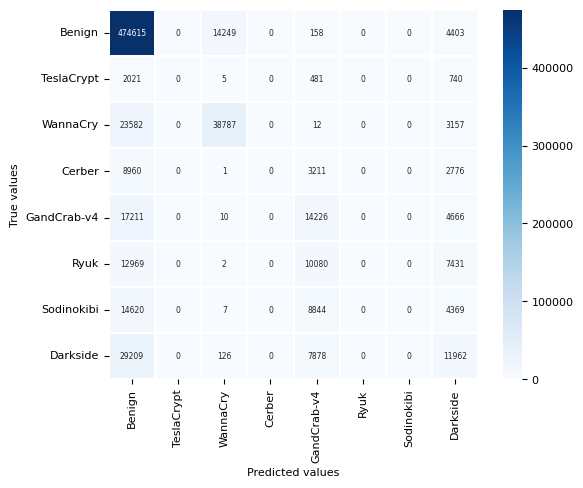

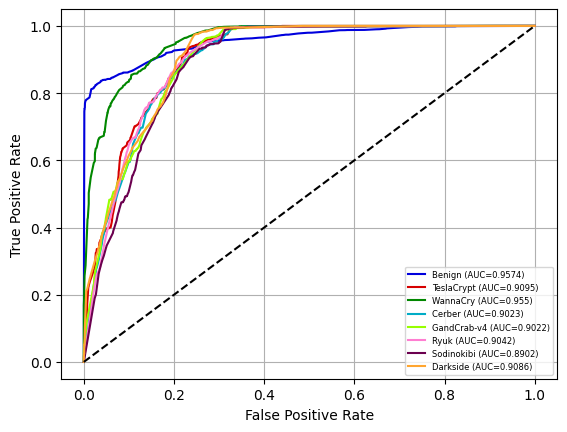

Test evaluation results: recall = 0.7486320147398331 , F1 = 0.6990006728180714 , acc = 0.7486320147398331 , precision = 0.6599807175800303 auc = 0.916175


In [ ]:
visualizeResults(x_test, y_test, pipeline_nsm)

# SVM Classifier

In [ ]:
# General
np.random.seed(1)

pipeline_nsm = skPipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(max_iter=500, random_state=0))])

# Repeated kfold cross validation definition
rkfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=45)

# Parameters of grid
param_grid = {
                "clf__kernel": ["rbf","linear"]
              }

# #####################
# GridSearchCV
# #####################
print("------------------------------")
print("SVC results")
print("------------------------------")
search = GridSearchCV(pipeline_nsm, param_grid, cv=rkfold, scoring='f1_micro', verbose=4)
result = search.fit(x_train, y_train)

# Training with best hyperparameters
pipeline_nsm.set_params(
    clf__kernel = result.best_params_["clf__kernel"]
    )

print(f"Best result at validation set: {result.best_score_} with hyperparameters {result.best_params_}")




------------------------------
SVC results
------------------------------
Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END ..................clf__kernel=rbf;, score=0.634 total time=  13.0s
[CV 2/10] END ..................clf__kernel=rbf;, score=0.530 total time=  13.2s
[CV 3/10] END ..................clf__kernel=rbf;, score=0.554 total time=  13.1s
[CV 4/10] END ..................clf__kernel=rbf;, score=0.535 total time=  13.1s
[CV 5/10] END ..................clf__kernel=rbf;, score=0.420 total time=  13.1s
[CV 6/10] END ..................clf__kernel=rbf;, score=0.628 total time=  13.1s
[CV 7/10] END ..................clf__kernel=rbf;, score=0.598 total time=  13.1s
[CV 8/10] END ..................clf__kernel=rbf;, score=0.677 total time=  13.2s
[CV 9/10] END ..................clf__kernel=rbf;, score=0.593 total time=  13.4s
[CV 10/10] END .................clf__kernel=rbf;, score=0.614 total time=  13.4s
[CV 1/10] END ...............clf__kernel=linear;, score

Retraining:
Classification report
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      7049
           1       0.00      0.00      0.00        46
           2       0.58      0.54      0.56       936
           3       0.08      0.07      0.07       214
           4       0.13      0.09      0.11       516
           5       0.00      0.00      0.00       435
           6       0.03      0.01      0.01       398
           7       0.22      0.36      0.27       703

    accuracy                           0.68     10297
   macro avg       0.23      0.24      0.23     10297
weighted avg       0.63      0.68      0.66     10297



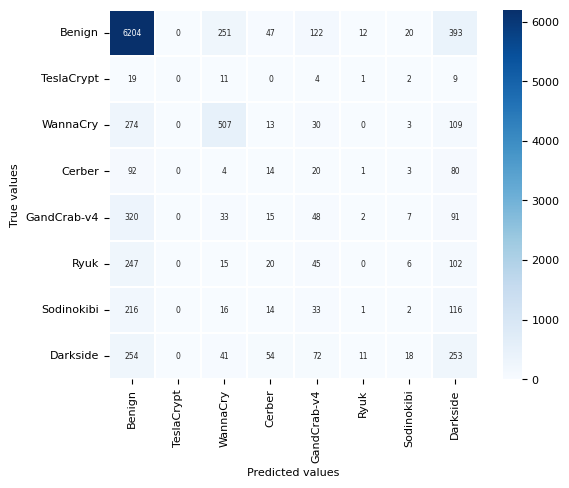

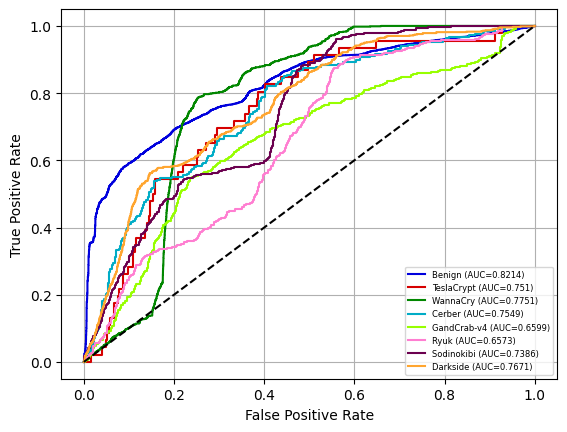

Test evaluation results: recall = 0.6825288919102651 , F1 = 0.6554713248721573 , acc = 0.6825288919102651 , precision = 0.633732311282334 auc = 0.7406625


In [ ]:
print("Retraining:")
pipeline_nsm2 = skPipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", random_state=0, max_iter=400, probability=True))])

pipeline_nsm2.fit(x_train, y_train)

visualizeResults(x_test, y_test, pipeline_nsm2)

# LDA

In [ ]:
# General
np.random.seed(1)

rkfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=45)
metrics = np.array([], dtype=np.int64).reshape(num_metrics,0)

for i, (train_index, val_index) in enumerate(rkfold.split(x_train, y_train)):
  pipeline_nsm = skPipeline([
     ("scaler", StandardScaler()),
     ("clf", LinearDiscriminantAnalysis())
  ])
  pipeline_nsm.fit(x_train[train_index],y_train[train_index])
  # Labels obtained
  ytrue = y_train[val_index]
  ypred = pipeline_nsm.predict(x_train[val_index])
  yproba = pipeline_nsm.predict_proba(x_train[val_index])
  # Calculate metrics
  result = calculateMetrics(ytrue, ypred, yproba, labels)
  metrics = np.hstack((metrics,result))

# Test
pipeline_nsm = skPipeline([
     ("scaler", StandardScaler()),
     ("clf", LinearDiscriminantAnalysis())
  ])
pipeline_nsm.fit(x_train,y_train)


------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.6789966944957979
recall: 0.6789966944957979
f1-score: 0.6789966944957979
accuracy: 0.6789966944957979
error: 0.3210033055042021
specificity: 0.9541423849279711
false positive rate: 0.0458576150720289
auc: 0.8246875
------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.6791527781149955
recall: 0.6791527781149955
f1-score: 0.6791527781149955
accuracy: 0.6791527781149955
error: 0.3208472218850045
specificity: 0.9541646825878565
false positive rate: 0.04583531741214353
auc: 0.82555
------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.6793764979691786
recall: 0.6793764979691786
f1-score: 0.6793764979691786
accuracy: 0.6793764979691786
error: 0.32062350203082135
specificity: 0.9541966425670255
false positive rate: 0.04580335743297448
auc: 0.8245875
------------------------------
Valor

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LinearDiscriminantAnalysis())])

Classification report
              precision    recall  f1-score   support

           0       0.71      0.98      0.82    493425
           1       0.00      0.00      0.00      3247
           2       0.02      0.00      0.00     65538
           3       0.15      0.02      0.04     14948
           4       0.00      0.00      0.00     36113
           5       0.16      0.03      0.05     30482
           6       0.10      0.00      0.00     27840
           7       0.22      0.13      0.16     49175

    accuracy                           0.68    720768
   macro avg       0.17      0.14      0.13    720768
weighted avg       0.52      0.68      0.58    720768



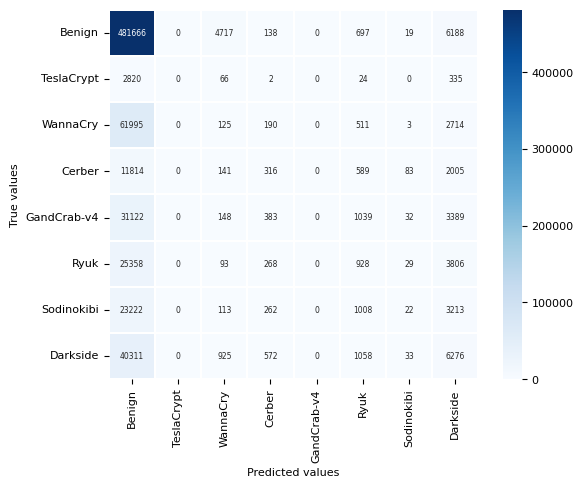

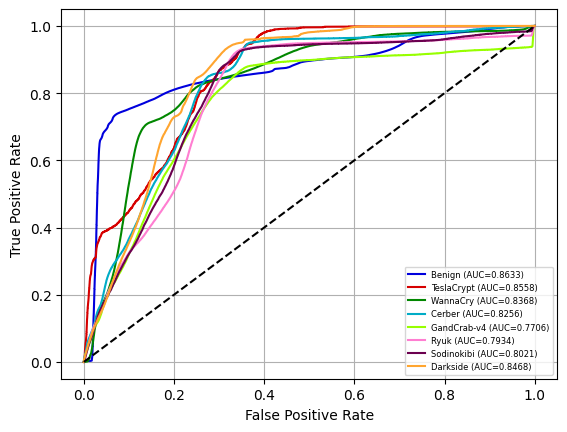

Test evaluation results: recall = 0.6789050013319127 , F1 = 0.5772360946090395 , acc = 0.6789050013319127 , precision = 0.5168748993344067 auc = 0.8243000000000001


In [ ]:
visualizeResults(x_test, y_test, pipeline_nsm)

# Naive Bayes

In [ ]:
# General
np.random.seed(1)

rkfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=45)
metrics = np.array([], dtype=np.int64).reshape(num_metrics,0)

for i, (train_index, val_index) in enumerate(rkfold.split(x_train, y_train)):
  pipeline_nsm = skPipeline([
     ("scaler", StandardScaler()),
     ("clf", GaussianNB())
  ])
  pipeline_nsm.fit(x_train[train_index],y_train[train_index])
  # Labels obtained
  ytrue = y_train[val_index]
  ypred = pipeline_nsm.predict(x_train[val_index])
  yproba = pipeline_nsm.predict_proba(x_train[val_index])
  # Calculate metrics
  result = calculateMetrics(ytrue, ypred, yproba, labels)
  metrics = np.hstack((metrics,result))

# Test
pipeline_nsm = skPipeline([
     ("scaler", StandardScaler()),
     ("clf", GaussianNB())
  ])
pipeline_nsm.fit(x_train,y_train)


------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.625699341327127
recall: 0.625699341327127
f1-score: 0.625699341327127
accuracy: 0.625699341327127
error: 0.374300658672873
specificity: 0.9465284773324467
false positive rate: 0.053471522667553284
auc: 0.822175
------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.631665204105346
recall: 0.631665204105346
f1-score: 0.631665204105346
accuracy: 0.631665204105346
error: 0.368334795894654
specificity: 0.9473807434436209
false positive rate: 0.05261925655637911
auc: 0.8228250000000001
------------------------------
Valores de métricas obtenidas:
------------------------------
precision: 0.6338260951000149
recall: 0.6338260951000149
f1-score: 0.6338260951000149
accuracy: 0.6338260951000149
error: 0.36617390489998514
specificity: 0.947689442157145
false positive rate: 0.05231055784285499
auc: 0.8222624999999999
--------------------------

Pipeline(steps=[('scaler', StandardScaler()), ('clf', GaussianNB())])

Classification report
              precision    recall  f1-score   support

           0       0.83      0.80      0.82    493425
           1       0.00      0.00      0.00      3247
           2       0.26      0.76      0.38     65538
           3       0.07      0.01      0.01     14948
           4       0.22      0.22      0.22     36113
           5       0.00      0.00      0.00     30482
           6       0.12      0.04      0.06     27840
           7       0.50      0.01      0.02     49175

    accuracy                           0.63    720768
   macro avg       0.25      0.23      0.19    720768
weighted avg       0.64      0.63      0.61    720768



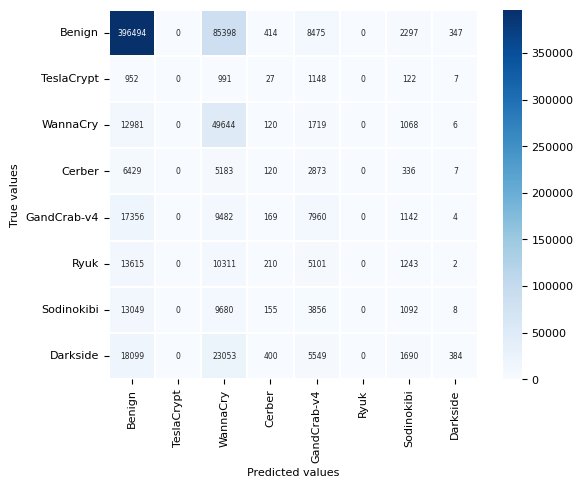

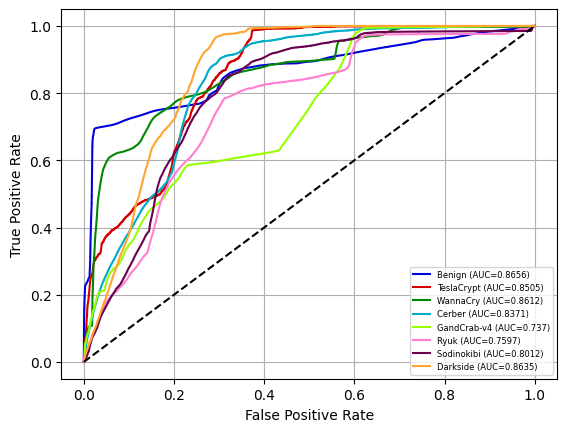

Test evaluation results: recall = 0.6322339504528502 , F1 = 0.6076914156440871 , acc = 0.6322339504528502 , precision = 0.6413464475489986 auc = 0.8219749999999999


In [ ]:
visualizeResults(x_test, y_test, pipeline_nsm)